<a href="https://colab.research.google.com/github/Harinikalidoss/Temperature-and-wind-speed-prediction-in-the-ozone-layer-using-ARIMA-Model/blob/main/Temperature_and_wind_speed_prediction_in_the_ozone_layer_using_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.names

!wget https://github.com/aaakashkumar/Ozone-Level-Detection/raw/master/eighthr.csv

--2023-01-15 05:30:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 818329 (799K) [application/x-httpd-php]
Saving to: ‘eighthr.data’

eighthr.data        100%[===================>] 799.15K  3.16MB/s    in 0.2s    

2023-01-15 05:31:00 (3.16 MB/s) - ‘eighthr.data’ saved [818329/818329]

--2023-01-15 05:31:00--  https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1694 (1.7K) [application/x-httpd-php]
Saving to: ‘eighthr.names’

eighthr.names       100%[===================>]   1.65K  --.-KB/s    in 0s      

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('eighthr.csv')
df_original = pd.read_csv('eighthr.csv')
print(df.shape)
df.head()

(2534, 74)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0


In [ ]:
df.describe()

,Result
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
df.drop(columns='Date', inplace=True)

In [ ]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0


In [ ]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [ ]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [ ]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


In [ ]:
if np.nan in df['T_PK'].values.tolist():
  print("NaN values found")
else:
  print("No NaN values found")

No NaN values found


In [ ]:
X = imputer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

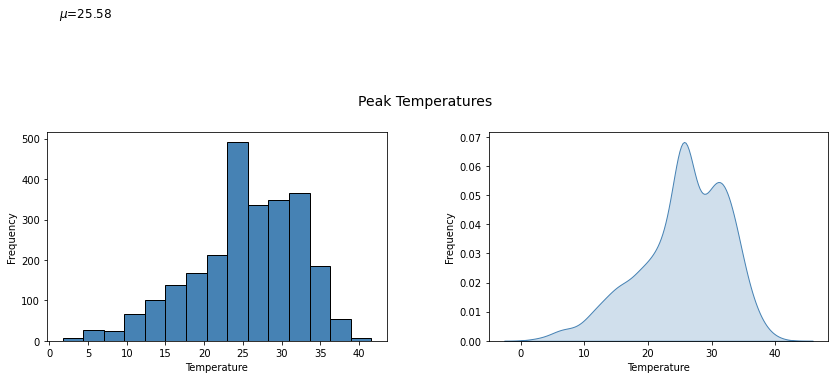

In [ ]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(df['T_PK'].mean(),2)),
         fontsize=12)
freq, bins, patches = ax.hist(df['T_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency")
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='steelblue')

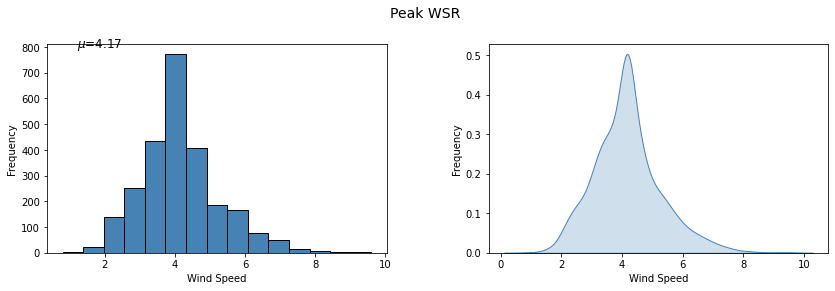

In [ ]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency")
ax.text(1.2, 800, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)),
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency")
sns.kdeplot(df['WSR_PK'], ax=ax1, shade=True, color='steelblue')

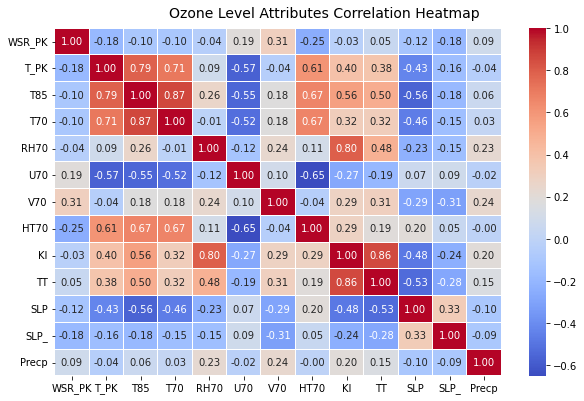

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))
subset_attributes = ['WSR_PK','T_PK','T85','T70','RH70','U70','V70','HT70','KI','TT','SLP','SLP_','Precp']
corr = df[subset_attributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ozone Level Attributes Correlation Heatmap', fontsize=14)

In [ ]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)
model = Sequential()
model.add(Dense(100, kernel_initializer=initializer, input_dim=72, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(50, kernel_initializer=initializer, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer=initializer, activation= "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               7300      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 13,001
Trainable params: 12,701
Non-traina

In [ ]:
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="binary_crossentropy" , optimizer=adam, metrics=["accuracy"])
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
95/95 [==============================] - 4s 17ms/step - loss: 0.6133 - accuracy: 0.7197 - val_loss: 0.5334 - val_accuracy: 0.9527
Epoch 2/10
95/95 [==============================] - 1s 8ms/step - loss: 0.3925 - accuracy: 0.9099 - val_loss: 0.2835 - val_accuracy: 0.9428
Epoch 3/10
95/95 [==============================] - 1s 8ms/step - loss: 0.2202 - accuracy: 0.9355 - val_loss: 0.1852 - val_accuracy: 0.9467
Epoch 4/10
95/95 [==============================] - 0s 4ms/step - loss: 0.1692 - accuracy: 0.9487 - val_loss: 0.1569 - val_accuracy: 0.9487
Epoch 5/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1437 - accuracy: 0.9493 - val_loss: 0.1530 - val_accuracy: 0.9467
Epoch 6/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9447 - val_loss: 0.1360 - val_accuracy: 0.9507
Epoch 7/10
95/95 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 0.9513 - val_loss: 0.1479 - val_accuracy: 0.9487
Epoch 8/10
95/95 [=

In [ ]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
score = np.sqrt(mean_squared_error(Y_test, pred))
print (score)

16/16 [==============================] - 0s 2ms/step
0.20623497472452018


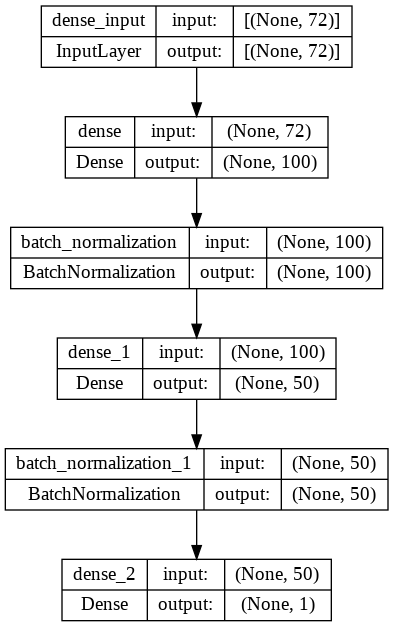

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
